# Vergleich BWS und Konkurrenz
###### 

Veröffentlichte Seminardaten der Anbieter BWS, ifb, WAF und Poko für das Jahr 2023 + SEO
> Stand der Daten: 21.10.2022, Markus Niggemeier
# 

In [119]:
from IPython import display
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [120]:

# Setting up plot data
plt.style.use('seaborn')
plz_shape_df = gpd.read_file("shape/plz-5stellig.shp", dtype={"plz": str})
zuordnung_plz_ort = pd.read_csv("zuordnung_plz_ort.csv", dtype={"plz": str})
germany_df = pd.merge(left=plz_shape_df, right=zuordnung_plz_ort, on="plz", how="inner")
top_cities = {
    'Berlin': (13.404954, 52.520008), 
    'Düsseldorf': (6.782048, 51.227144),
    'Frankfurt': (8.682127, 50.110924),
    'Hamburg': (9.993682, 53.551086),
    'Leipzig': (12.387772, 51.343479),
    'München': (11.576124, 48.137154),
    'Kassel': (9.479700, 51.312700),
    'Erfurt': (11.029900, 50.984800),
    'Stuttgart': (9.181332, 48.777128),
    'Nürnberg': (11.077438, 49.449820),
    'Hannover': (9.73322, 52.37052)}

# Map plotting function
def brd_map(provider, df):
    fig, ax = plt.subplots()
    
    plz_shape_df.plot(ax=ax, color='lightgreen', alpha=0.8)
    df.plot(
        ax=ax, 
        column='count', 
        categorical=False, 
        legend=True, 
        cmap='autumn_r',
        alpha=0.8
    )

    for c in top_cities.keys():

        ax.text(
            x=top_cities[c][0], 
            y=top_cities[c][1] + 0.08, 
            s=c, 
            fontsize=10,
            ha='center', 
        )

        ax.plot(
            top_cities[c][0], 
            top_cities[c][1], 
            marker='o',
            c='black', 
            alpha=0.8
        )

    ax.set(
        title=provider, 
        aspect=1.5, 
        facecolor='lightblue'
    ); 

# Read data from xlsx files
bws_data = pd.read_excel("bws_data_osm.xlsx")
ifb_data = pd.read_excel("ifb_data_osm.xlsx")
waf_data = pd.read_excel("waf_data_osm.xlsx")
poko_data = pd.read_excel("poko_data_osm.xlsx")

# OSM counts
bws_osm_counts = pd.DataFrame(bws_data["osm_id"].value_counts()).reset_index()
bws_osm_counts.columns = ["osm_id", "count"]
ifb_osm_counts = pd.DataFrame(ifb_data["osm_id"].value_counts()).reset_index()
ifb_osm_counts.columns = ["osm_id", "count"]
waf_osm_counts = pd.DataFrame(waf_data["osm_id"].value_counts()).reset_index()
waf_osm_counts.columns = ["osm_id", "count"]
poko_osm_counts = pd.DataFrame(poko_data["osm_id"].value_counts()).reset_index()
poko_osm_counts.columns = ["osm_id", "count"]

# Postal code counts
bws_plz_counts = pd.merge(left=zuordnung_plz_ort, right=bws_osm_counts, on="osm_id", how="left")
bws_plz_counts = bws_plz_counts[bws_plz_counts["count"].notna()]
ifb_plz_counts = pd.merge(left=zuordnung_plz_ort, right=ifb_osm_counts, on="osm_id", how="left")
ifb_plz_counts = ifb_plz_counts[ifb_plz_counts["count"].notna()]
waf_plz_counts = pd.merge(left=zuordnung_plz_ort, right=waf_osm_counts, on="osm_id", how="left")
waf_plz_counts = waf_plz_counts[waf_plz_counts["count"].notna()]
poko_plz_counts = pd.merge(left=zuordnung_plz_ort, right=poko_osm_counts, on="osm_id", how="left")
poko_plz_counts = poko_plz_counts[poko_plz_counts["count"].notna()]

# Map postal code polygons
bws_map_plz_counts = pd.merge(left=germany_df, right=bws_plz_counts, on="plz", how="left")
bws_map_plz_counts = bws_map_plz_counts[["plz", "geometry", "count"]]
ifb_map_plz_counts = pd.merge(left=germany_df, right=ifb_plz_counts, on="plz", how="left")
ifb_map_plz_counts = ifb_map_plz_counts[["plz", "geometry", "count"]]
waf_map_plz_counts = pd.merge(left=germany_df, right=waf_plz_counts, on="plz", how="left")
waf_map_plz_counts = waf_map_plz_counts[["plz", "geometry", "count"]]
poko_map_plz_counts = pd.merge(left=germany_df, right=poko_plz_counts, on="plz", how="left")
poko_map_plz_counts = poko_map_plz_counts[["plz", "geometry", "count"]]

# Drop unnecessary columns
bws_data.drop(columns=["subtitle", "sem_no"], axis=1, inplace=True)
ifb_data.drop(columns=["sem_no", "online", "url"], axis=1, inplace=True)
waf_data.drop(columns=["subtitle", "sem_no", "url"], axis=1, inplace=True)
poko_data.drop(columns=["starter-kit", "online", "url"], axis=1, inplace=True)

# BR1 seminar names
bws_br1 = ["BR 1 – Das Einmaleins für neu gewählte Betriebsrät*innen",
           "BR 1 – Das Einmaleins für neu gewählte Betriebsrät*innen - Kompaktseminar",
           "BR 1 Crash - Das Einmaleins für neu gewählte Betriebsrät*innen",
           "BR 1 kompakt online – 4 Wochen intensiv"]
ifb_br1 = ["Betriebsrat Teil I"]
waf_br1 = ["Betriebsverfassungsrecht Teil 1"]
poko_br1 = ["Betriebsverfassungsrecht I"]

# Count of seminars
bws_sem_count = bws_data["title"].count()
ifb_sem_count = ifb_data["title"].count()
waf_sem_count = waf_data["title"].count()
poko_sem_count = poko_data["title"].count()
seminar_count = pd.DataFrame([["BWS", bws_sem_count], ["ifb", ifb_sem_count],
                              ["WAF", waf_sem_count], ["Poko", poko_sem_count]],
                             columns=["Anbieter", "Anzahl Seminare"])

# SEO data
domain_traffic = pd.read_csv("seo/domain_traffic_jan_sep.csv", index_col=0)
domain_traffic.drop(columns=["Zieltyp", "Absprungrate"], axis=1, inplace=True)
keyword_gaps = pd.read_excel("seo/keyword_gaps.xlsx")
social_media_seo = pd.read_csv("seo/social_media_jan_sep.csv", index_col=0)

In [121]:
%matplotlib inline

In [1]:
%%html
<style>
div.input {
    display:none;
}
</style>

### 
## 1.) Seminardaten 2023

### Anzahl Seminare

<AxesSubplot:>

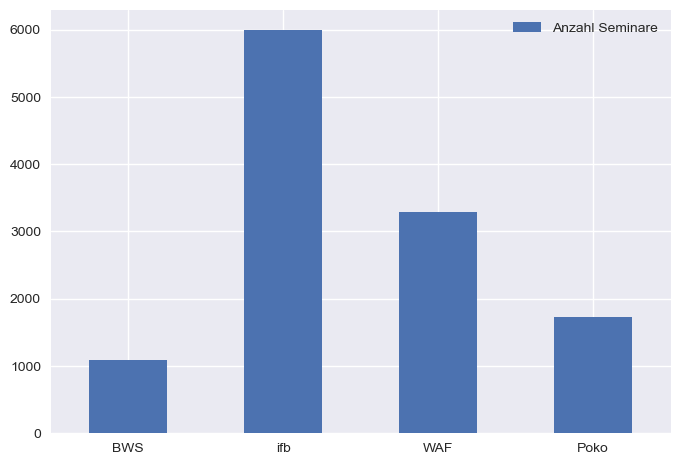

In [122]:
seminar_count.plot.bar(x='Anbieter', y='Anzahl Seminare', xlabel='', rot=0)

### Geografische Seminardaten

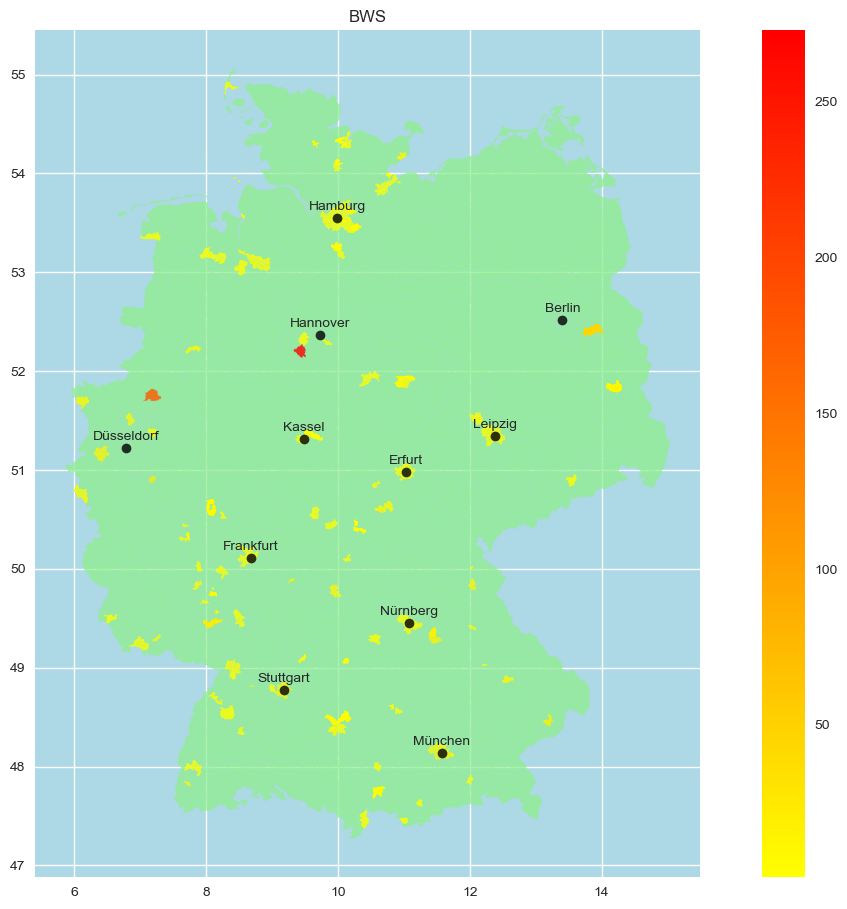

In [123]:
plt.rcParams["figure.figsize"] = [16,11]
brd_map("BWS", bws_map_plz_counts)

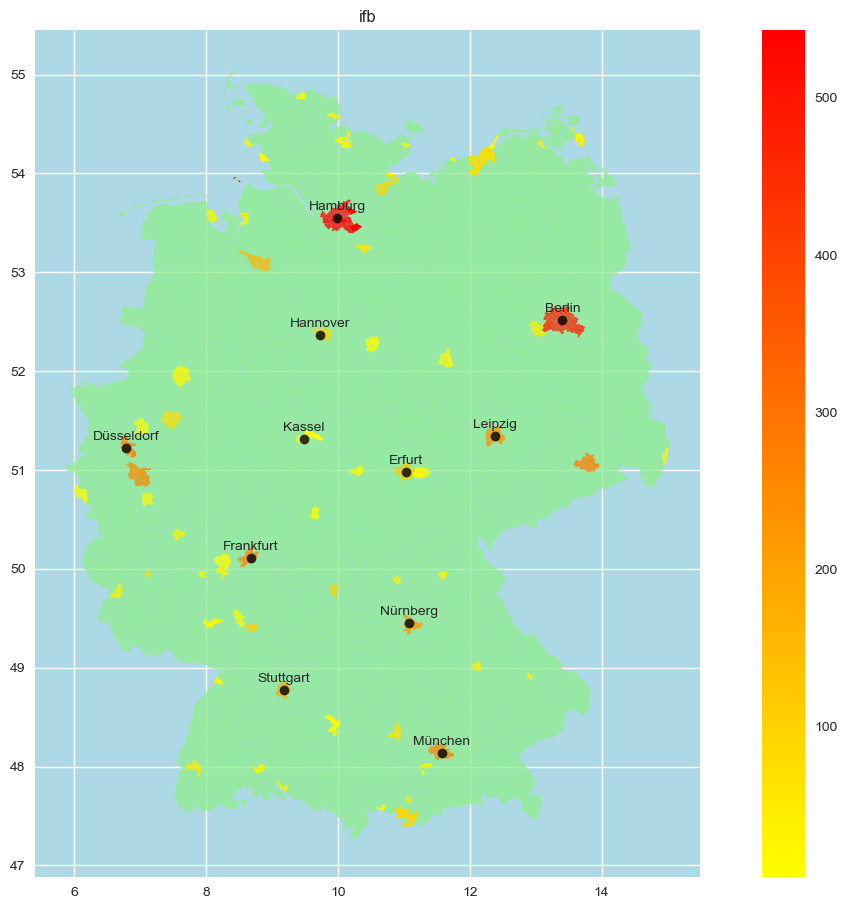

In [124]:
brd_map("ifb", ifb_map_plz_counts)

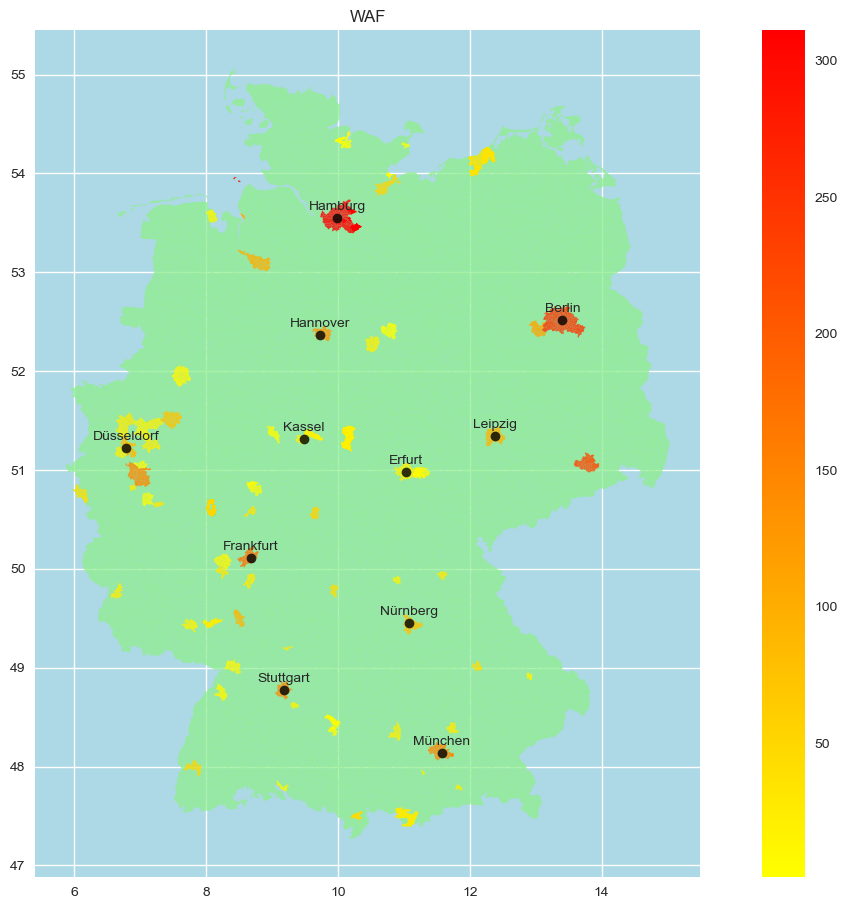

In [125]:
brd_map("WAF", waf_map_plz_counts)

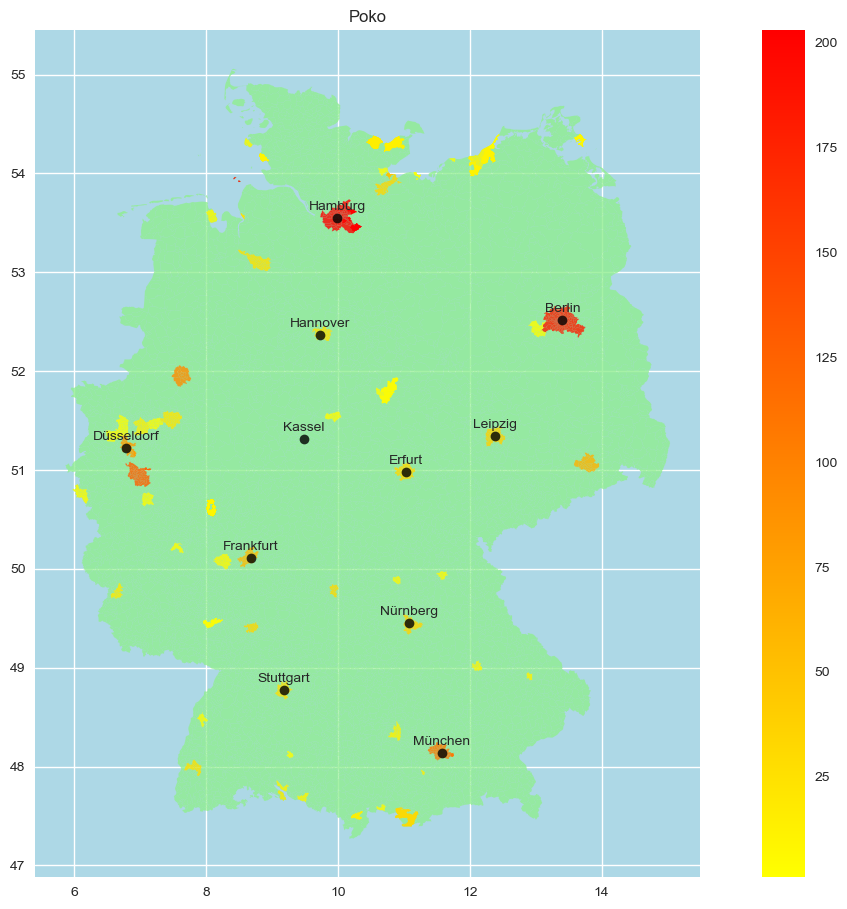

In [126]:
brd_map("Poko", poko_map_plz_counts)

### 
## 2.) SEO-Daten Jan-Sept. '22
#### 
### Überblick

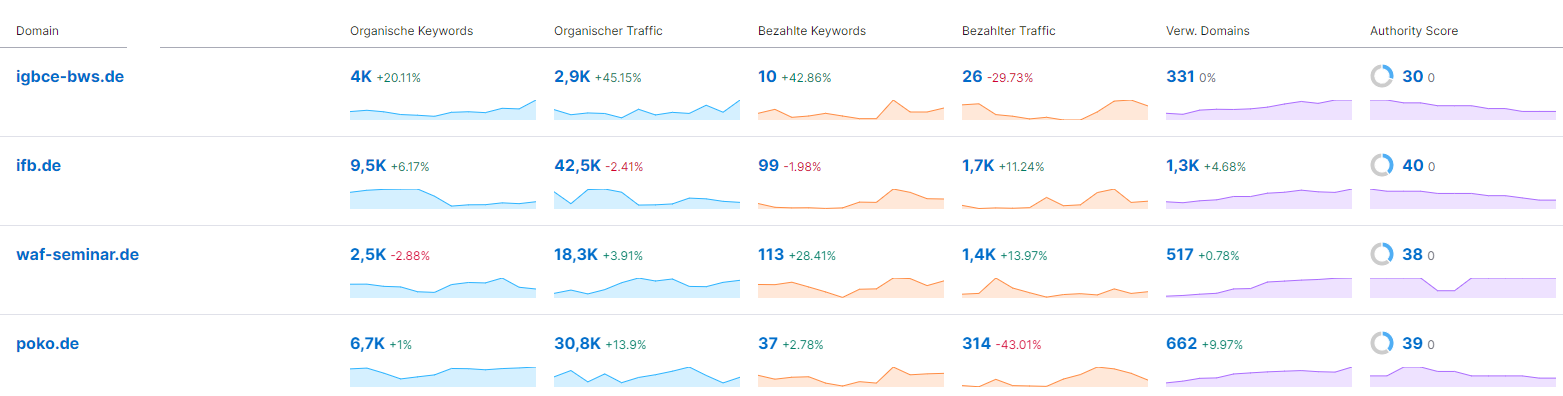

In [127]:
display.Image("seo/bws_competitors_overview_year.png")

#### 
### Traffic-Quellen
#### 

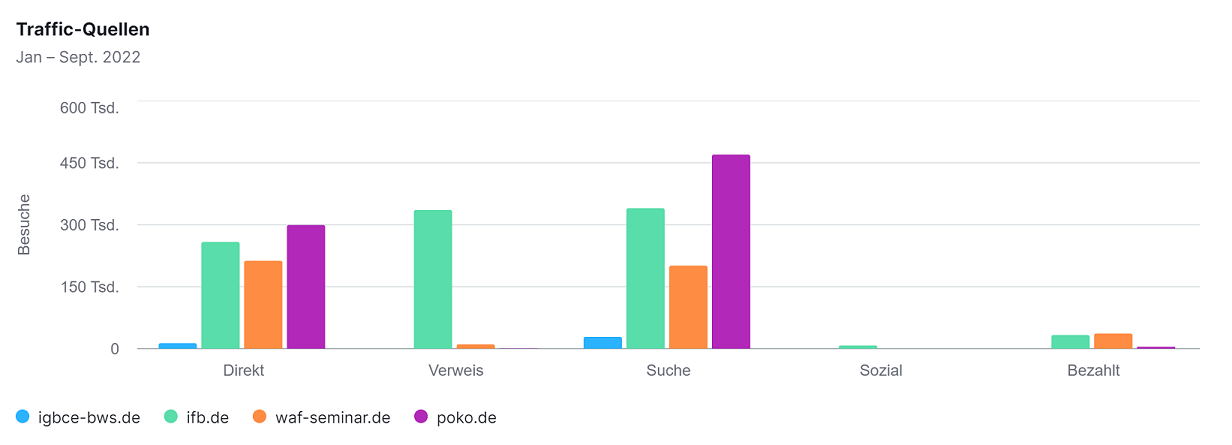

In [128]:
display.Image("seo/traffic_sources_jan_sep.png")

#### 
### Domain Traffic
#### 

In [129]:
domain_traffic

,Besuche,Einzelne Besucher,Seiten / Besuch,Durchschn. Besuchsdauer
Ziel,,,,
igbce-bws.de,42153,26523,3.66,03:15
ifb.de,982439,462261,3.84,09:36
waf-seminar.de,464615,228183,2.84,06:46
poko.de,780831,368078,1.71,10:27


#### 
#### Besucher

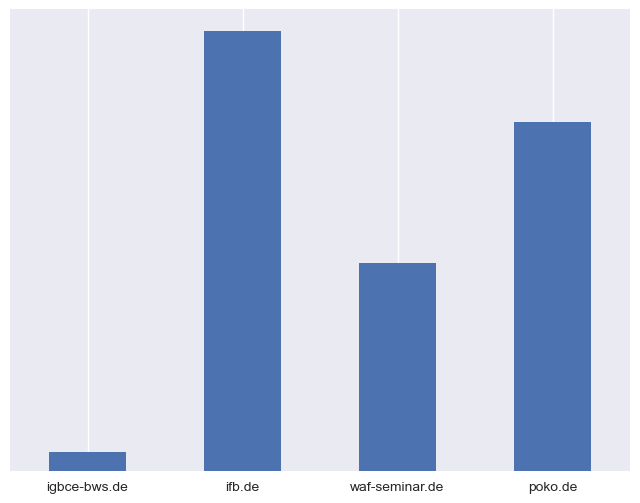

In [130]:
plt.rcParams["figure.figsize"] = [8,6]
visitors = domain_traffic["Besuche"].plot.bar(xlabel='', rot=0)
visitors.get_yaxis().set_visible(False)

#### 
#### Durchschnittliche Dauer des Besuchs (Sekunden)

In [131]:
domain_traffic["Durchschn. Besuchsdauer"] = [int(t[:2])*60 + int(t[3:]) for t in domain_traffic["Durchschn. Besuchsdauer"]]

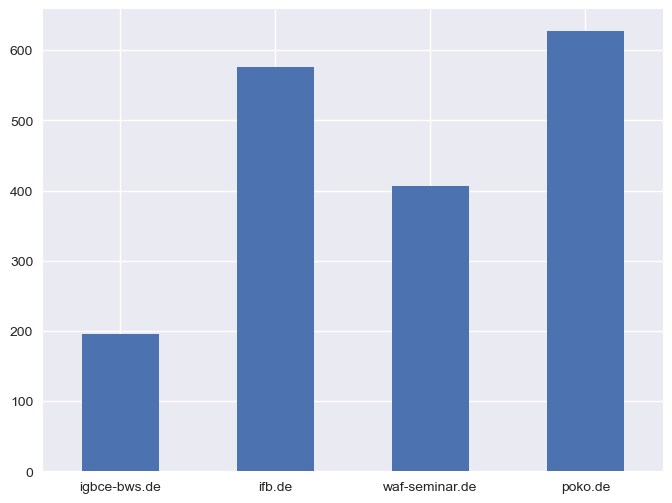

In [132]:
visit_dur = domain_traffic["Durchschn. Besuchsdauer"].plot.bar(xlabel='', rot=0)

#### 
### Social Media

<AxesSubplot:>

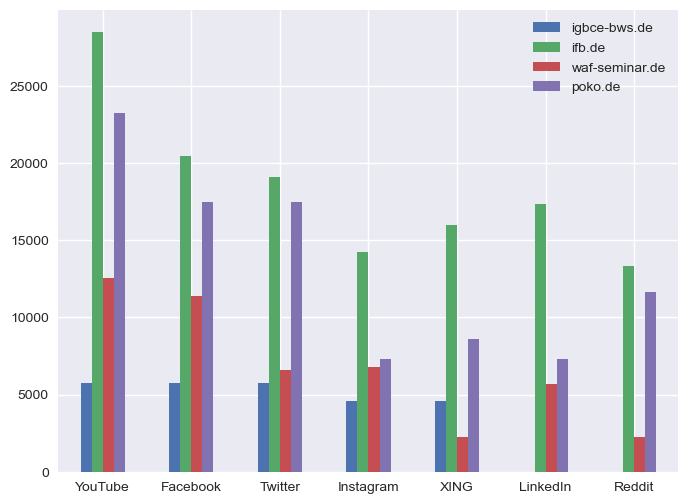

In [133]:
social_media_seo.plot.bar(rot=0)

#### 
### Keywords

In [134]:
keyword_gaps = keyword_gaps[["Keyword", "igbce-bws.de", "ifb.de", "waf-seminar.de", "poko.de"]]

#### Top Keywords BWS mit Vergleich Konkurrenz

In [135]:
keyword_gaps.sort_values(by=["igbce-bws.de"], ascending=False).head(10)

,Keyword,igbce-bws.de,ifb.de,waf-seminar.de,poko.de
1,betriebsrat,98,32,4,36
42,aktuelle rechtsprechung,98,26,21,40
149,betriebsänderung betriebsrat,98,7,21,18
153,fortbildung sgb ix,97,8,30,40
294,aufgaben einer jav,95,3,75,16
322,betrvg 37 abs 6,94,23,26,14
267,seminarkosten bei krankheit,94,27,21,15
80,betriebsrat pflicht ab wann,93,45,7,52
38,betriebsänderung,93,5,25,27
137,antrag auf gleichstellung betriebsrat,92,8,85,21


#### Top Keywords ifb mit Vergleich Konkurrenz

In [136]:
keyword_gaps.sort_values(by=["ifb.de"], ascending=False).head()

,Keyword,igbce-bws.de,ifb.de,waf-seminar.de,poko.de
285,abkürzung betriebsratsvorsitzender,92,93,24,9
210,br einsicht gehaltslisten,46,91,71,50
241,mitbestimmungspflichtige angelegenheiten betri...,69,84,22,54
96,konstituierende sitzung betriebsrat ablauf,43,80,92,8
228,jav wahl anfechten,65,77,53,1


#### Top Keywords WAF mit Vergleich Konkurrenz

In [137]:
keyword_gaps.sort_values(by=["waf-seminar.de"], ascending=False).head()

,Keyword,igbce-bws.de,ifb.de,waf-seminar.de,poko.de
55,mobiles arbeiten betriebsvereinbarung,50,20,98,71
25,betriebsvereinbarung mobiles arbeiten,52,20,96,74
215,einladung wirtschaftsausschusssitzung,15,6,94,18
129,wahlordnung betrvg pdf,84,58,93,14
233,kündigung betriebsrat ersatzmitglied,79,1,93,36


#### Top Keywords WAF mit Vergleich Konkurrenz

In [138]:
keyword_gaps.sort_values(by=["poko.de"], ascending=False).head()

,Keyword,igbce-bws.de,ifb.de,waf-seminar.de,poko.de
82,betriebsratsbüro,21,12,17,94
254,schulung outlook 365,48,18,15,92
318,betriebsratsmitglied absetzen,30,15,18,88
252,schichtarbeit mitbestimmung betriebsrat,26,17,40,87
284,179 sgb ix kommentar,72,7,52,83
